In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [4]:
iris = pd.read_csv("iris.data")
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris.dropna(how='all', inplace= True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 5 columns):
sepal_length    149 non-null float64
sepal_width     149 non-null float64
petal_length    149 non-null float64
petal_width     149 non-null float64
species         149 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


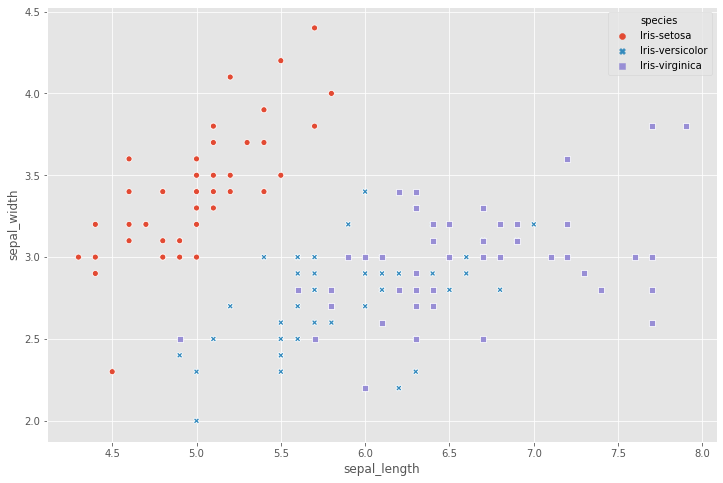

In [7]:
sns.scatterplot(x = iris.sepal_length, y = iris.sepal_width,
               hue = iris.species, style = iris.species)

In [8]:
X = iris.iloc[:,0:4].values
Y = iris.species.values

In [9]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [10]:
covariance_matrix = np.cov(X.T)
print("Covariance matrix: \n", covariance_matrix)

Covariance matrix: 
 [[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [11]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvectors: \n", eigen_vectors, "\n")
print("Eigenvalues: \n", eigen_values)


Eigenvectors: 
 [[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]] 

Eigenvalues: 
 [2.92442837 0.93215233 0.14946373 0.02098259]


In [12]:
eigen_vec_svd, s, v = np.linalg.svd(X.T)
eigen_vec_svd

array([[-0.52308496, -0.36956962,  0.72154279,  0.26301409],
       [ 0.25956935, -0.92681168, -0.2411952 , -0.12437342],
       [-0.58184289, -0.01912775, -0.13962963, -0.80099722],
       [-0.56609604, -0.06381646, -0.63380158,  0.52321917]])

In [13]:
variance_explained = [ (i/sum(eigen_values))*100 for i in eigen_values]
variance_explained

[72.62003332692034, 23.147406858644135, 3.7115155645845164, 0.5210442498510154]

In [14]:
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained

array([ 72.62003333,  95.76744019,  99.47895575, 100.        ])

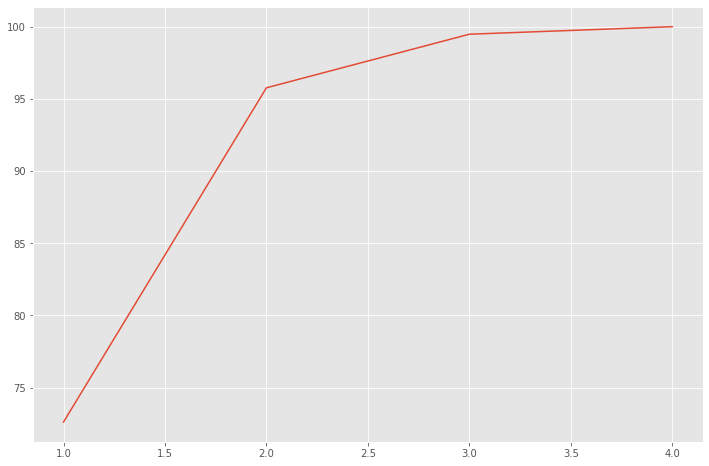

In [15]:
sns.lineplot(x = [1,2,3,4], y= cumulative_variance_explained)

In [16]:
projection_matrix = eigen_vectors[:,:2]
projection_matrix

array([[ 0.52308496, -0.36956962],
       [-0.25956935, -0.92681168],
       [ 0.58184289, -0.01912775],
       [ 0.56609604, -0.06381646]])

In [17]:
x_pca = X.dot(projection_matrix) 
x_pca

array([[-2.10795032,  0.64427554],
       [-2.38797131,  0.30583307],
       [-2.32487909,  0.56292316],
       [-2.40508635, -0.687591  ],
       [-2.08320351, -1.53025171],
       [-2.4636848 , -0.08795413],
       [-2.25174963, -0.25964365],
       [-2.3645813 ,  1.08255676],
       [-2.20946338,  0.43707676],
       [-2.17862017, -1.08221046],
       [-2.34525657, -0.17122946],
       [-2.24590315,  0.6974389 ],
       [-2.66214582,  0.92447316],
       [-2.2050227 , -1.90150522],
       [-2.25993023, -2.73492274],
       [-2.21591283, -1.52588897],
       [-2.20705382, -0.52623535],
       [-1.9077081 , -1.4415791 ],
       [-2.35411558, -1.17088308],
       [-1.93202643, -0.44083479],
       [-2.21942518, -0.96477499],
       [-2.79116421, -0.50421849],
       [-1.83814105, -0.11729122],
       [-2.24572458, -0.17450151],
       [-1.97825353,  0.59734172],
       [-2.06935091, -0.27755619],
       [-2.18514506, -0.56366755],
       [-2.15824269, -0.34805785],
       [-2.28843932,

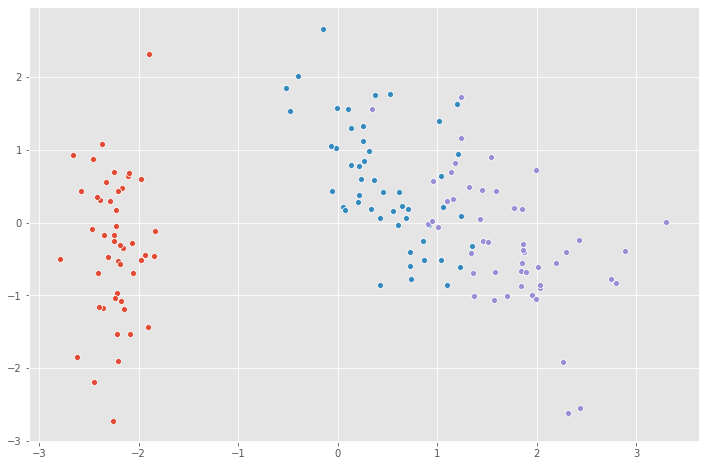

In [18]:
for species in ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']:
    sns.scatterplot(x_pca[Y==species, 0],
                   x_pca[Y==species, 1])